In [66]:
!pip install ggplot

    100% |████████████████████████████████| 2.2MB 5.3MB/s 


In [56]:
exec(compile(open("core.py").read(), "core.py", 'exec'))
ndraws = 20

In [57]:
arm1 = BernoulliArm(0.7)
arm1.draw()

0.0

In [58]:
[arm1.draw() for i in range(ndraws)]

[1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0]

In [59]:
arm2 = NormalArm(10.0, 1.0)
arm2.draw()

8.615889059698747

In [60]:
[arm2.draw() for i in range(ndraws)]

[12.800584185424032,
 9.057874352722017,
 10.48704545511951,
 9.05962949948348,
 8.978203905361752,
 11.090617448063504,
 10.503767460165061,
 10.14545989813825,
 9.25046812781953,
 8.657782641676544,
 13.01422568441128,
 11.197950029655246,
 9.349788225271219,
 11.27808514098864,
 9.927554283706401,
 8.899948889949986,
 8.340606735046418,
 10.571567497200407,
 9.933788038964382,
 7.846554580272956]

In [44]:
arm3 = BernoulliArm(0.2)
arm3.draw()

0.0

In [61]:
[arm3.draw() for i in range(ndraws)]

[1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [62]:
arms = [arm1, arm2, arm3]
n_arms = len(arms)
n_arms

3

Now test and make plots.

In [90]:
exec(compile(open("core.py").read(), "core.py", 'exec'))
import random
import pandas as pd
import seaborn as sns

random.seed(1)
means = [0.1, 0.1, 0.1, 0.1, 0.9]
n_arms = len(means)
random.shuffle(means)
arms = [BernoulliArm(mu) for mu in means]
print(("Best arm is " + str(ind_max(means))))

epsilons = [0.1, 0.2, 0.3, 0.4, 0.5]
cumulative_rewards = {}

for epsilon in epsilons:
  algo = EpsilonGreedy(epsilon, [], [])
  algo.initialize(n_arms)
  ind = str(epsilon)
  [_,_,_,_, cumulative_rewards[ind]] = test_algorithm(algo, arms, 1, 250)

resultsDf = pd.DataFrame(cumulative_rewards)


Best arm is 2


Text(0.5, 1.0, 'Cumulative Reward of Different Algorithms')

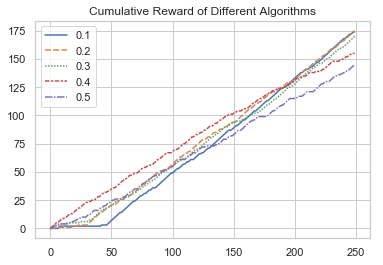

In [91]:
sns.set(style="whitegrid")
ax = sns.lineplot(data=resultsDf)
ax.set_title("Cumulative Reward of Different Algorithms")

In [92]:
algo1 = EpsilonGreedy(0.1, [], [])
algo1 = EpsilonGreedy(0.1, [], [])
algo2 = Softmax(1.0, [], [])
algo3 = UCB1([], [])
algo4 = Exp3(0.2, [])

algos = [algo1, algo2, algo3, algo4]

In [93]:
for algo in algos:
  algo.initialize(n_arms)

In [94]:
for t in range(1000):
  for algo in algos:
    chosen_arm = algo.select_arm()
    reward = arms[chosen_arm].draw()
    algo.update(chosen_arm, reward)

In [95]:
algo1.counts
algo1.values

[0.15,
 0.055555555555555566,
 0.8939732142857137,
 0.08333333333333333,
 0.09090909090909093]

In [96]:
algo2.counts
algo2.values

[0.08125,
 0.11333333333333338,
 0.8948863636363631,
 0.08974358974358976,
 0.08241758241758246]

In [97]:
algo3.counts
algo3.values

[0.1578947368421053, 0.11111111111111113, 0.8949079089924147, 0.0625, 0.25]

In [98]:
algo4.weights

[29.354986079719907,
 7147.5456435228625,
 3202731910002706.5,
 1275.2272986617143,
 67.64228946871579]

In [100]:
num_sims = 1000
horizon = 10
results = test_algorithm(algo1, arms, num_sims, horizon)
#results

Exercise: 
Try running multiple simulations.
Can you plot how the probability of choosing the right arm changes over time?